In [1]:
%matplotlib inline

In [2]:
import os
import json
import copy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import wandb

In [3]:
X_LIM = (0, 150)
Y_LIM = (0, 1200)
ERROR_BAR = 'se'
SMOOTH = 10
WANDB_ENTITY = 'odiamond18'

In [4]:
# Get data for my code
api = wandb.Api(timeout=40)
run_dfs = []
i = 0

runs = api.runs(WANDB_ENTITY + '/' + 'og_aux_task_codebase')
for run in runs:
    if run.config['exp_id'] == "dqn_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'dqn'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "hallway_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'hallway'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "corner_no_code_changes":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'corner'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "gentest_30_seed_with_reset_and_total_loss":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'gen-and-test'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)

    elif run.config['exp_id'] == "gentest_30_seed_fixed_random":
        print(f'run_{i}')
        i += 1
        run_data = pd.DataFrame([row for row in run.scan_history(keys=['episode_len', 'episode'])])
        #run_data['algo'] = 'paper_code_no_weight_reset'
        run_data['algo'] = 'random-tasks'
        run_data.dropna(inplace=True)
        run_dfs.append(run_data)
    


if len(run_dfs) != 150:
    print('warning total runs is not 150')

run_0
run_1


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=40 sec). Create a new API with an integer timeout larger than 40, e.g., `api = wandb.Api(timeout=50)` to increase the graphql timeout.


run_2
run_3
run_4
run_5
run_6
run_7
run_8
run_9
run_10
run_11
run_12
run_13
run_14
run_15
run_16
run_17
run_18
run_19
run_20
run_21
run_22
run_23
run_24
run_25
run_26
run_27
run_28
run_29
run_30
run_31
run_32
run_33
run_34
run_35
run_36
run_37
run_38
run_39
run_40
run_41
run_42
run_43
run_44
run_45
run_46
run_47
run_48
run_49
run_50
run_51
run_52
run_53
run_54
run_55
run_56
run_57
run_58
run_59
run_60
run_61
run_62
run_63
run_64
run_65


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=40 sec). Create a new API with an integer timeout larger than 40, e.g., `api = wandb.Api(timeout=50)` to increase the graphql timeout.


run_66
run_67
run_68
run_69
run_70
run_71
run_72


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=40 sec). Create a new API with an integer timeout larger than 40, e.g., `api = wandb.Api(timeout=50)` to increase the graphql timeout.


run_73
run_74
run_75


wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=40 sec). Create a new API with an integer timeout larger than 40, e.g., `api = wandb.Api(timeout=50)` to increase the graphql timeout.


run_76
run_77
run_78
run_79
run_80
run_81
run_82
run_83
run_84
run_85
run_86
run_87
run_88
run_89
run_90
run_91
run_92
run_93
run_94
run_95
run_96
run_97
run_98
run_99
run_100
run_101
run_102
run_103
run_104
run_105
run_106
run_107
run_108
run_109
run_110
run_111
run_112
run_113
run_114
run_115
run_116
run_117
run_118
run_119
run_120
run_121
run_122
run_123
run_124
run_125
run_126
run_127
run_128
run_129
run_130
run_131
run_132
run_133
run_134
run_135
run_136
run_137
run_138
run_139
run_140
run_141
run_142
run_143
run_144
run_145
run_146
run_147
run_148
run_149


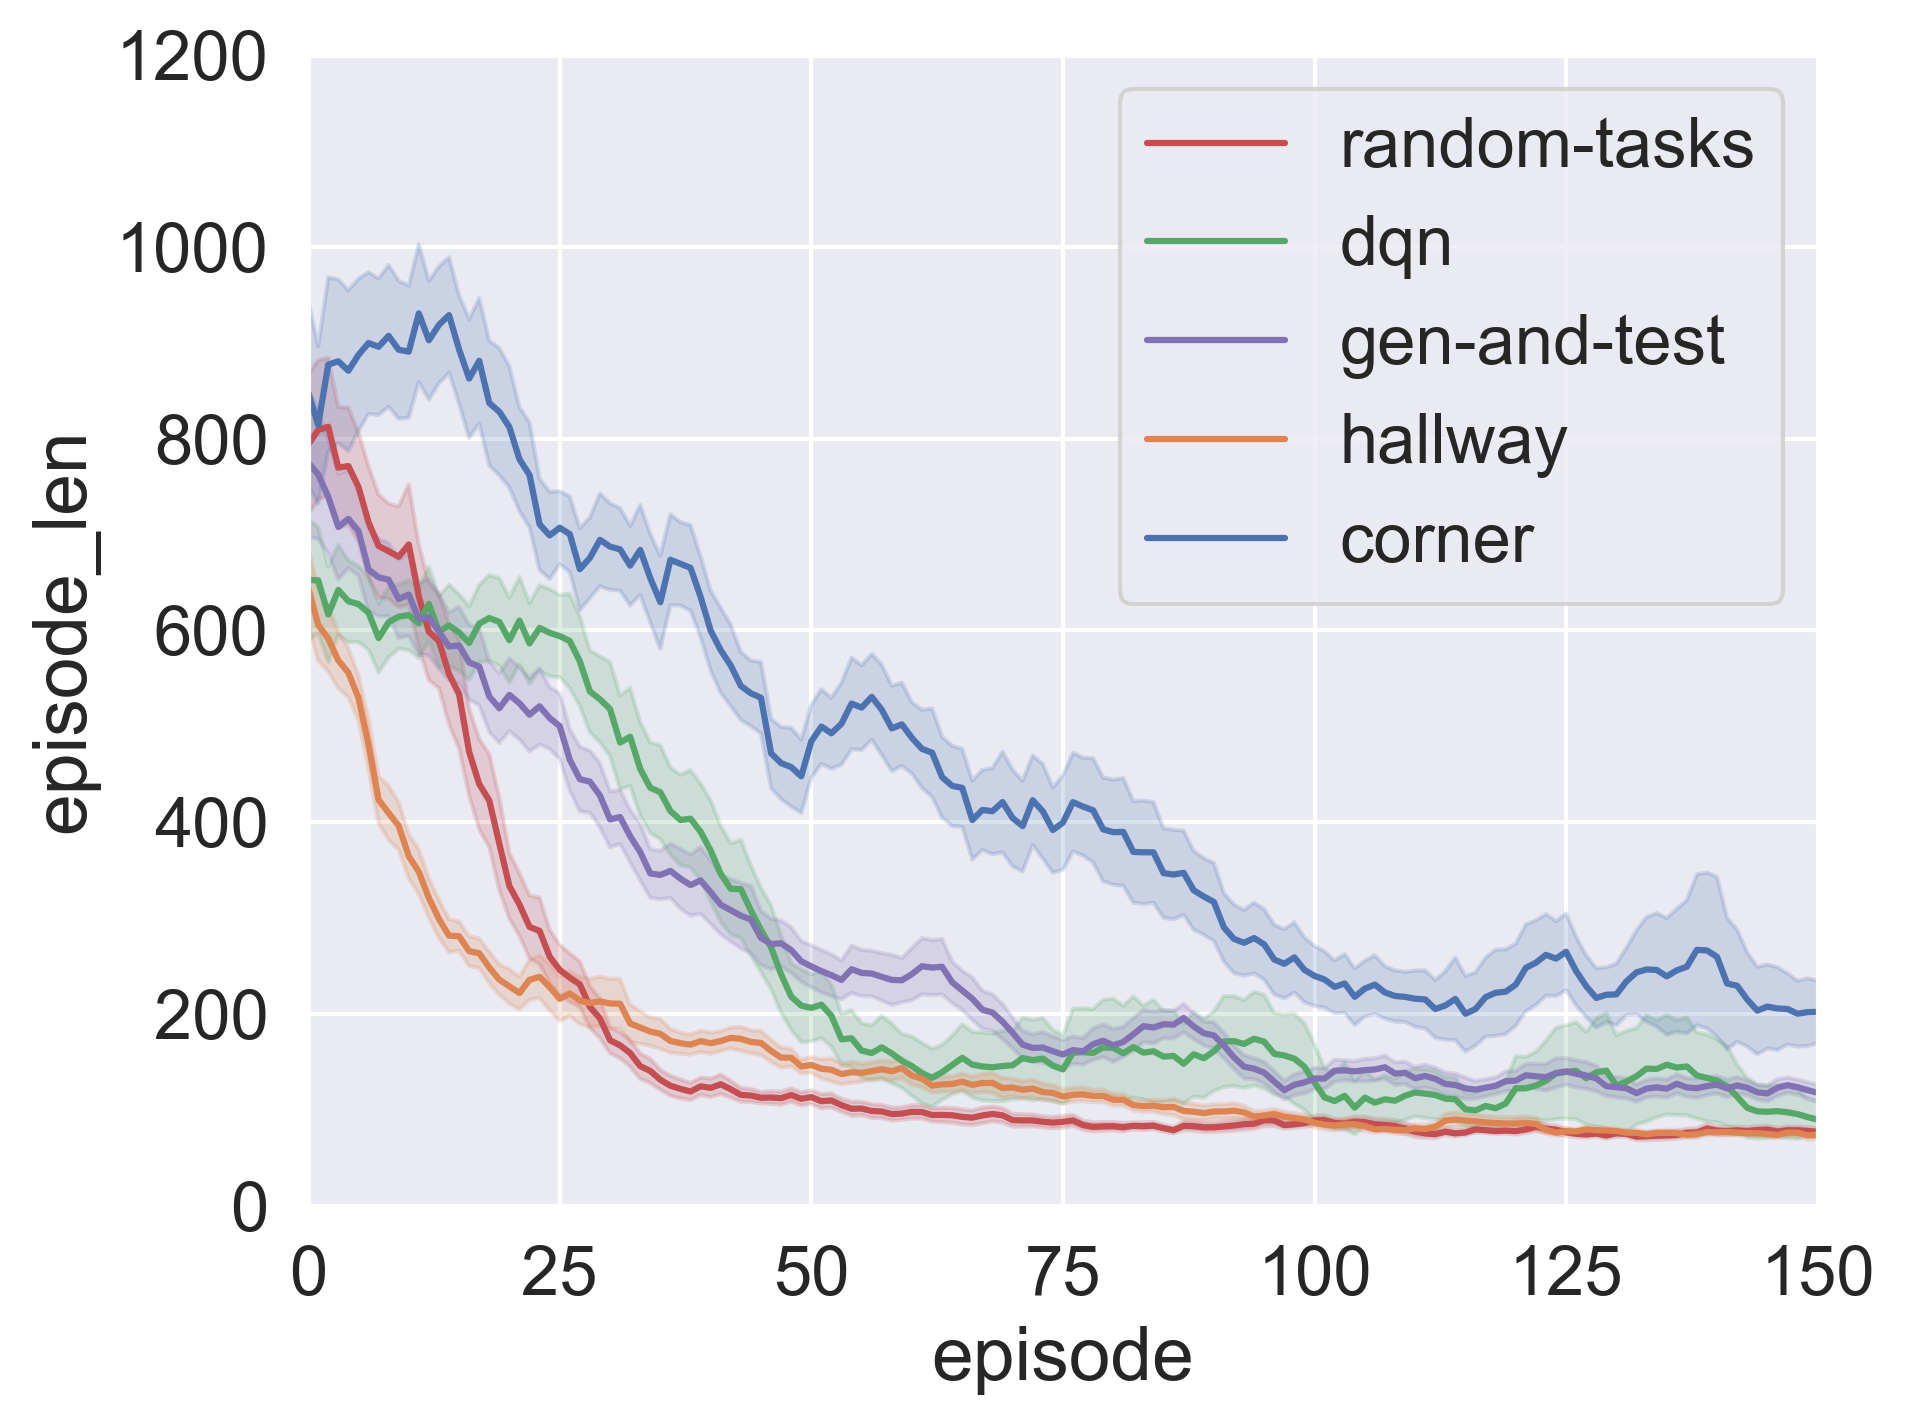

In [5]:
new_dfs = copy.deepcopy(run_dfs)
for df in new_dfs:
    df['episode_len'] = df['episode_len'].rolling(window=SMOOTH, min_periods=1, center=True).mean()
stacked_df = pd.concat(new_dfs, axis=0, ignore_index=True)
# Plot learning curves for each level of the condition, averaging y values for each timestep across runs with the same level
sns.set_theme(style="darkgrid", font_scale=1.5, rc={"figure.dpi":300, 'savefig.dpi':300})
sns.lineplot(x='episode', 
             y='episode_len', 
             hue='algo', 
             palette={
                 'corner': '#4c72b0', 
                 'hallway': '#dd8452',
                 'dqn': '#55a868',
                 'random-tasks': '#c44e52',
                 'gen-and-test': '#8172b3'
                 }, 
             data=stacked_df, 
             errorbar=ERROR_BAR)
plt.xlim(*X_LIM)
plt.ylim(*Y_LIM)
plt.legend(loc='best').set_draggable(True)

plt.tight_layout(pad=0.5)
plt.show()

In [6]:
print(sns.color_palette().as_hex())
sns.color_palette()

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [7]:
print(len(stacked_df))

29960
